# Activations
> Activations used between layers

In [1]:
# default_exp activations

In [2]:
# export
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
# hide
import matplotlib.pyplot as plt

torch.Tensor.ndim = property(lambda x: x.dim())
%matplotlib inline

In [4]:
# export
def relu(inplace=True):
    return nn.ReLU(inplace=inplace)

ReLU = Relu = relu

In [5]:
a = torch.randn(3, 3)
a, relu()(a)

(tensor([[0.0000, 0.0000, 0.1396],
         [0.7610, 0.0000, 0.1118],
         [0.0000, 0.0000, 0.0000]]),
 tensor([[0.0000, 0.0000, 0.1396],
         [0.7610, 0.0000, 0.1118],
         [0.0000, 0.0000, 0.0000]]))

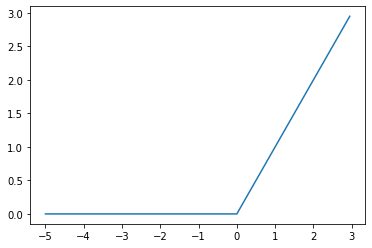

In [6]:
x = torch.arange(-5, 3, 0.05)
y = Relu(inplace=False)(x)
plt.plot(x, y);

In [7]:
# export
def LeakyReLU(inplace=True, negative_slope=0.01):
    return nn.LeakyReLU(negative_slope, inplace=inplace)

leaky_relu = leakyrelu = LeakyReLU

In [8]:
a = torch.randn(3, 3)
a, leaky_relu()(a)

(tensor([[ 0.4458,  0.0084,  1.1934],
         [-0.0066, -0.0087, -0.0084],
         [ 0.1442,  0.6694,  0.2855]]),
 tensor([[ 0.4458,  0.0084,  1.1934],
         [-0.0066, -0.0087, -0.0084],
         [ 0.1442,  0.6694,  0.2855]]))

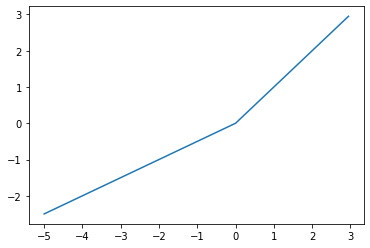

In [9]:
x = torch.arange(-5, 3, 0.05)
y = LeakyReLU(inplace=False, negative_slope=0.5)(x)
plt.plot(x, y);

## Mish
$$
\begin{align}
\text{mish}(x) &= \text{tanh}\left(\text{softplus}(x)\right)\\
\text{tanh}(x) &= \frac{\exp(2x) - 1}{\exp(2x) + 1}\\
\text{softplus}(x) &= \ln(1 + \exp(x))
\end{align}
$$

In [10]:
# export
class Mish(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        return x * (torch.tanh(F.softplus(x)))
    
mish = Mish

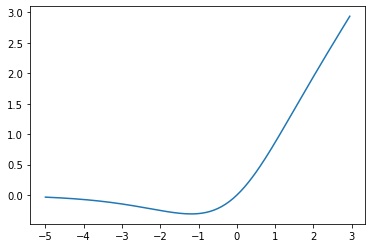

In [11]:
x = torch.arange(-5, 3, 0.05)
y = Mish()(x)
plt.plot(x, y);

## Sigmoid Activation
Usually used to convert a number into a probability:
$$
\sigma(x) = \frac{1}{1+\exp(-x)}
$$

In [12]:
# export
sigmoid = nn.Sigmoid

In [13]:
sigmoid()(torch.randn((3,1)))

tensor([[0.3305],
        [0.4534],
        [0.6104]])

## Softmax Activation
Converts multicategorical numerical numbers to a probability distribution. Suppose $y_ij$ is the output for the i-th instance for the j-th category. Then the probability is:
$$
p(y_{ij}) = \frac{\exp(y_{ij})}{\sum_j \exp(y_{ij})}
$$

In [14]:
# export
softmax = nn.Softmax(dim=-1)

In [15]:
y = torch.randn((2,3))
p = softmax(y)
print(p)
print(p.sum(dim=-1, keepdim=True))

tensor([[0.2092, 0.1568, 0.6340],
        [0.2197, 0.3284, 0.4519]])
tensor([[1.],
        [1.]])


In [16]:
# export
__activations__ = {
    'relu': relu(),
    'leaky_relu': leaky_relu(),
    'mish': mish(),
    'sigmoid': sigmoid(),
    'softmax': softmax
}

def get_activation(activation):
    return __activations__[activation.lower()]

In [17]:
# hide
from nbdev.export import *
notebook2script()

Converted Activations.ipynb.
Converted Layers.ipynb.
Converted Model.ipynb.
Converted data.ipynb.
Converted index.ipynb.
Converted losses.ipynb.
